# 1. Import the necessary libraries 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline


# 2. Read the data as a data frame

In [2]:
df= pd.read_csv('bank-full.csv')

In [3]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


# 3. Perform basic EDA which should include the following and print out your insights at every step.

a. Shape of the data 

In [4]:
df.shape

(45211, 17)

b. Data type of each attribute

Dataframe has 7 integer and 10 categorical attributes

In [5]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

c. Checking the presence of missing values 

In [6]:
df.isnull().values.any()

False

there are no missing values in the dataframe

d. 5 Point summary of numerical attributes

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


e. Checking the presence of outliers

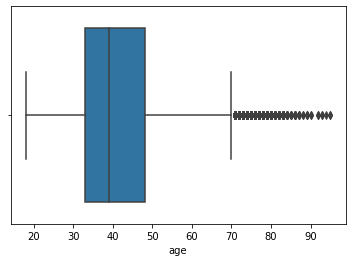

In [8]:
sns.boxplot(df.age)

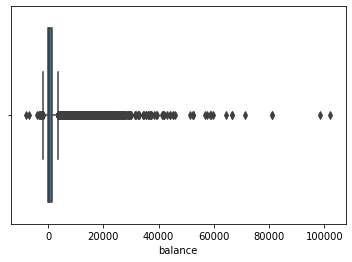

In [9]:
sns.boxplot(df.balance)

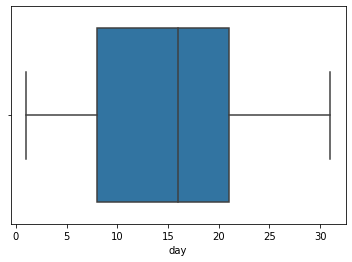

In [10]:
sns.boxplot(df.day)

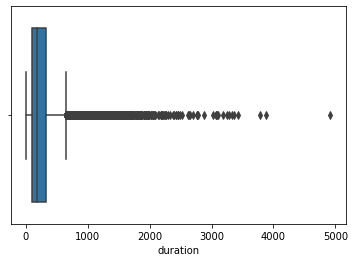

In [11]:
sns.boxplot(df.duration)

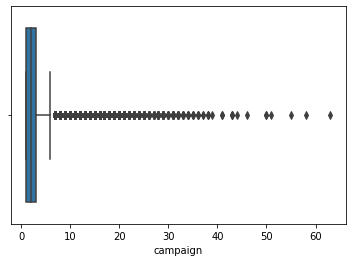

In [12]:
sns.boxplot(df.campaign)

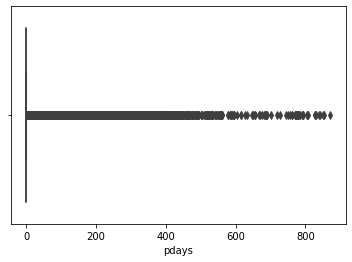

In [13]:
sns.boxplot(df.pdays)

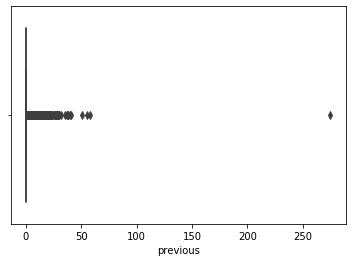

In [14]:
sns.boxplot(df.previous)

# 4. Prepare the data to train a model – check if data types are appropriate, get rid of the missing values etc

In [15]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [16]:
cat_columns = ['job','marital','education','default','housing','loan','contact','poutcome','Target','month']

In [17]:
df[cat_columns] = df[cat_columns].apply(lambda x: x.astype('category'))
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)
df[cat_columns] = df[cat_columns].apply(lambda x: x.astype('int64'))

In [18]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [19]:
df= df.drop('duration',axis=1)

In [20]:
df[df < 0] = 0

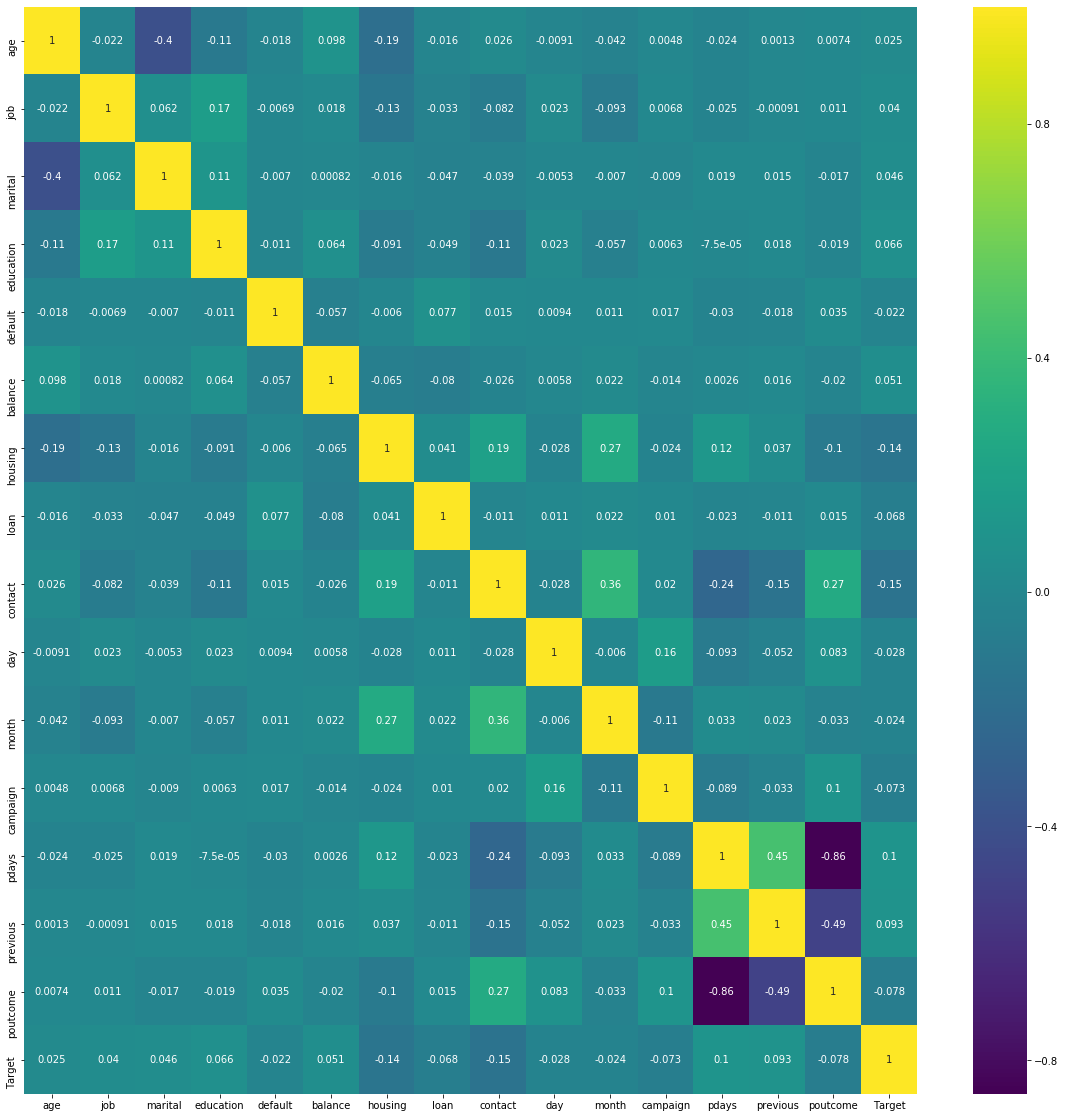

In [21]:
colormap = plt.cm.viridis
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap=colormap)

In [22]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
x = df.loc[:,df.columns!='Target']
y = df['Target']
x = rs.fit_transform(x)

# 5. Train a few standard classification algorithms, note and comment on their performances across different classification metrics.

In [23]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [24]:
x_train.shape

(33908, 15)

In [25]:
x_test.shape

(11303, 15)

In [26]:
my_metrics = pd.DataFrame(index = ['accuracy','precision','recall'],columns = ['LogisticReg','Decisiontree','NaiveBayes'])

In [27]:
from sklearn.linear_model import LogisticRegression 
logreg = LogisticRegression(random_state = 15)
logreg.fit(x_train,y_train)
y_pred_test = logreg.predict(x_test)
my_metrics.loc['accuracy','LogisticReg'] = metrics.accuracy_score(y_pred=y_pred_test,y_true=y_test)
my_metrics.loc['precision','LogisticReg'] = metrics.precision_score(y_pred=y_pred_test,y_true=y_test)
my_metrics.loc['recall','LogisticReg'] = metrics.recall_score(y_pred=y_pred_test,y_true=y_test)

C:\Users\renuka.c\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [28]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = 'entropy',min_samples_split=30,min_samples_leaf=10,random_state=10)
dtc.fit(x_train,y_train)
y_pred_test = dtc.predict(x_test)
my_metrics.loc['accuracy','Decisiontree'] = metrics.accuracy_score(y_pred=y_pred_test,y_true=y_test)
my_metrics.loc['precision','Decisiontree'] = metrics.precision_score(y_pred=y_pred_test,y_true=y_test)
my_metrics.loc['recall','Decisiontree'] = metrics.recall_score(y_pred=y_pred_test,y_true=y_test)

In [29]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_pred_test = gnb.predict(x_test)
my_metrics.loc['accuracy','NaiveBayes'] = metrics.accuracy_score(y_pred=y_pred_test,y_true=y_test)
my_metrics.loc['precision','NaiveBayes'] = metrics.precision_score(y_pred=y_pred_test,y_true=y_test)
my_metrics.loc['recall','NaiveBayes'] = metrics.recall_score(y_pred=y_pred_test,y_true=y_test)

In [30]:
100*my_metrics


,LogisticReg,Decisiontree,NaiveBayes
accuracy,88.5075,88.3217,80.89
precision,40,47.8195,25.1003
recall,1.23935,24.6321,33.9272


out of all the trained classification models, DECISION TREE performed best with highest accuracy and precision

# 6. Build the ensemble models and compare the results with the base models. Note: Random forest can be used only with Decision trees.

creating a dataframe for ensemble comparison

In [31]:
et_metrics = pd.DataFrame(index = ['accuracy'],columns = ['Randforest','bagging','adaboost'])

applying random forest ensemble for decision tree

In [32]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier

kfold = model_selection.KFold(n_splits=10, random_state=7)
rfcl_model = RandomForestClassifier(criterion = 'entropy',n_estimators=100, max_features=3)
rfcl_results = model_selection.cross_val_score(rfcl_model,x_train , y_train, cv=kfold)


In [33]:
et_metrics.loc['accuracy','Randforest']=round(rfcl_results.mean(),4)


applying bagging on logistic regression

In [34]:
from sklearn.ensemble import BaggingClassifier
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

kfold = model_selection.KFold(n_splits=10, random_state=7)
lr = LogisticRegression()
lr_model = BaggingClassifier(base_estimator=lr,random_state=7)
lr_results = model_selection.cross_val_score(lr_model,x_train , y_train, cv=kfold)
et_metrics.loc['accuracy','bagging']=round(lr_results.mean(),4)

applying adaptive boosting on gaussian naive bayes

In [35]:
from sklearn.ensemble import AdaBoostClassifier

gnb = GaussianNB()
gnb_model = AdaBoostClassifier(random_state=7)
gnb_results = model_selection.cross_val_score(gnb_model,x_train , y_train, cv=kfold)
et_metrics.loc['accuracy','adaboost']=round(gnb_results.mean(),4)

In [36]:
et_metrics*100

,Randforest,bagging,adaboost
accuracy,89.18,88.18,88.94


ensemble technique on logistic regression did not help much but accuracy of decision tree fairly improved and naive bayes got a lot (~8%) better after applying ensemble techniques